📁 Upload your CSV file (e.g., city_day.csv)


Saving city_day.csv to city_day (2).csv
✅ Initial Dataset Shape: (29531, 16)


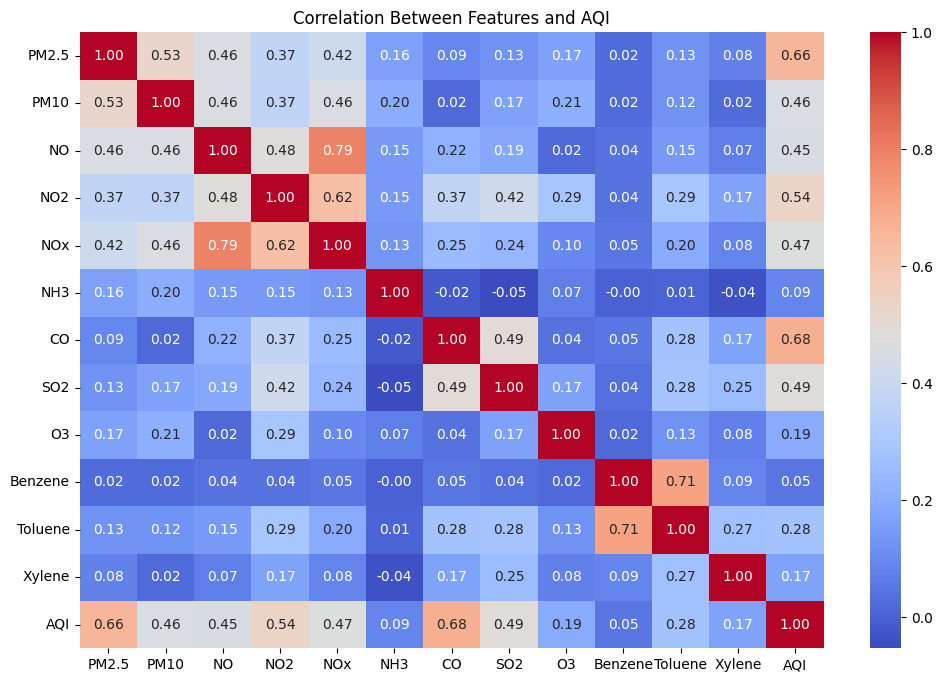

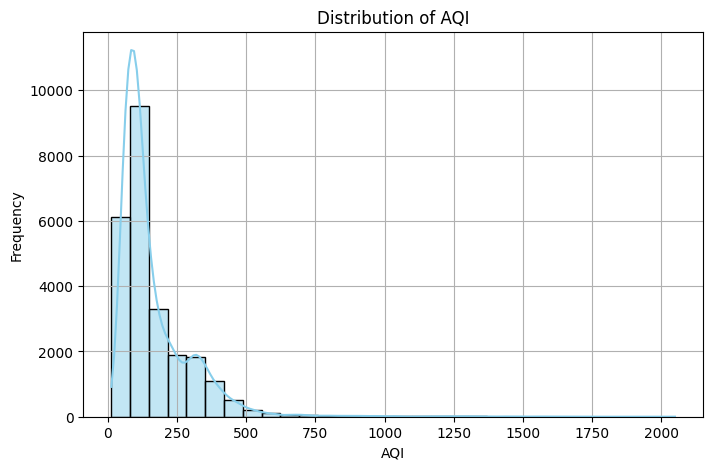

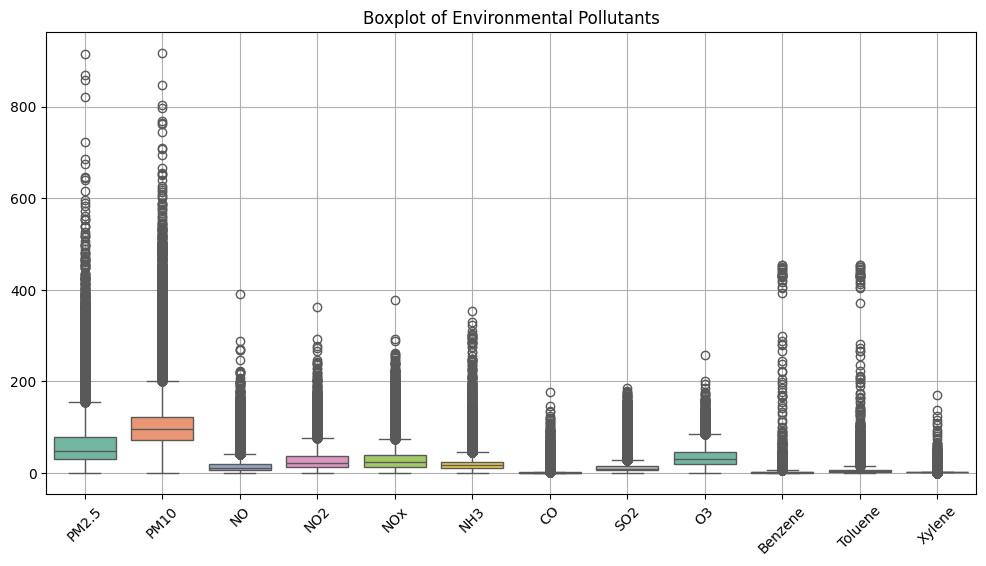

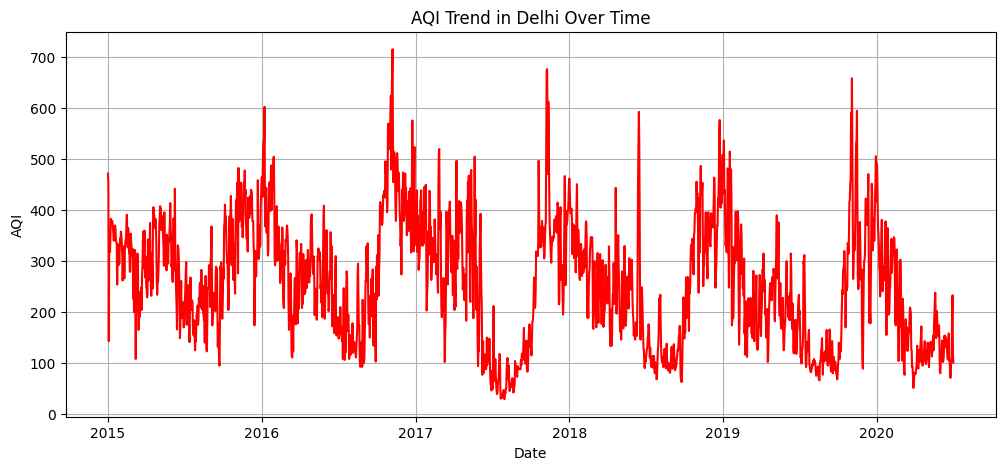


📊 Model Evaluation:
Mean Squared Error: 3533.3118360305484
R-squared Score: 0.8070390610736403


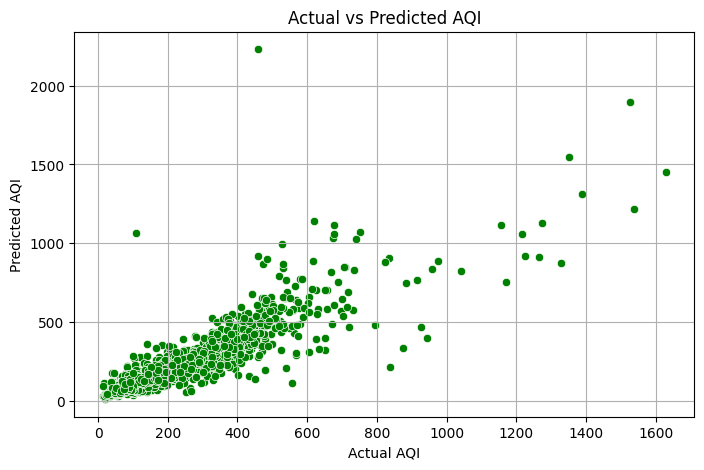

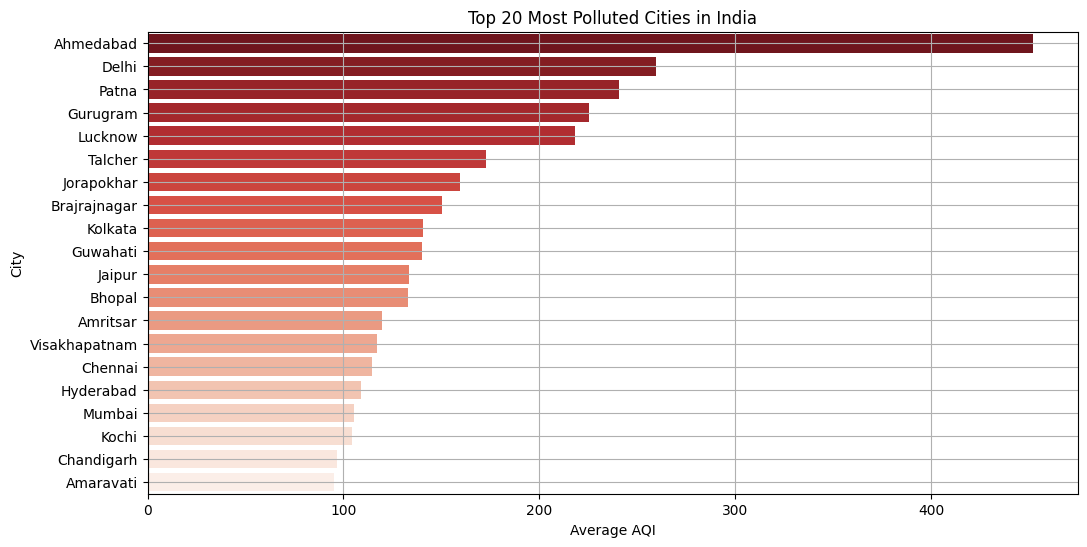

In [15]:
# ============================================
# Air Quality Index (AQI) Prediction Project
# Regression Model with Visualizations
# ============================================

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# ============================================
# Step 2: Upload Dataset
# ============================================
print("📁 Upload your CSV file (e.g., city_day.csv)")
uploaded = files.upload()

# Automatically use uploaded file name
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ============================================
# Step 3: Explore and Clean Data
# ============================================
print("✅ Initial Dataset Shape:", df.shape)

# Drop rows with missing AQI values
df = df.dropna(subset=['AQI'])

# Fill remaining missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Keep original for visualization
original_df = df.copy()

# Drop non-numeric columns for modeling
df_model = df.drop(columns=['Date', 'City', 'AQI_Bucket'])

# ============================================
# Step 4: Correlation Heatmap
# ============================================
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features and AQI')
plt.show()

# ============================================
# Step 5: Data Visualizations
# ============================================

# AQI Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of Pollutants
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_model.drop('AQI', axis=1), palette='Set2')
plt.title('Boxplot of Environmental Pollutants')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# AQI Trend for a Sample City (Delhi)
sample_city = original_df[original_df['City'] == 'Delhi'].sort_values('Date')
plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(sample_city['Date']), sample_city['AQI'], color='red')
plt.title('AQI Trend in Delhi Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# ============================================
# Step 6: Prepare Data for Model
# ============================================

X = df_model.drop('AQI', axis=1)
y = df_model['AQI']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# Step 7: Train Linear Regression Model
# ============================================

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\n📊 Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# ============================================
# Step 8: Actual vs Predicted Plot
# ============================================
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.grid(True)
plt.show()

# ============================================
# Step 9: Top 20 Most Polluted Cities
# ============================================
top_cities = original_df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Reds_r')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.title('Top 20 Most Polluted Cities in India')
plt.grid(True)
plt.show()


In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from google.colab import files

# Step 1: Upload the Excel file using the upload dialog
uploaded = files.upload()

# Step 2: Load the uploaded Excel file into a pandas DataFrame
# Automatically gets the first uploaded file name
filename = next(iter(uploaded))
df = pd.read_excel(filename)

# Display the first few rows of the dataset
print("Preview of the dataset:")
display(df)

# Step 3: Draw all possible pairwise plots (scatter, histograms, etc.)
# Select only numerical columns for plotting
numeric_df = df.select_dtypes(include='number')

# If there are no numeric columns, notify the user
if numeric_df.empty:
    print("No numeric data found to plot.")
else:
    # Plot pairplot using seaborn for all numerical columns
    print("Generating pairwise plots for numerical columns...")
    sns.pairplot(numeric_df)
    plt.suptitle("Pairwise Plots of Numerical Columns", y=1.02)
    plt.show()

    # Generate correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    # Generate individual histograms
    for col in numeric_df.columns:
        plt.figure()
        sns.histplot(numeric_df[col], kde=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # Generate scatter plots for all unique pairs of numerical columns
    for x_col, y_col in combinations(numeric_df.columns, 2):
        plt.figure()
        sns.scatterplot(data=numeric_df, x=x_col, y=y_col)
        plt.title(f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()


Saving stations.csv.xlsx to stations.csv.xlsx
Preview of the dataset:


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


No numeric data found to plot.


Saving station_day.csv.xlsx to station_day.csv.xlsx
First 5 rows of the dataset:
  StationId       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
0     AP001 2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76   
1     AP001 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2     AP001 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   
3     AP001 2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59   
4     AP001 2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00   

       O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  109.26     0.17     5.92    0.10    NaN        NaN  
1  127.09     0.20     6.50    0.06  184.0   Moderate  
2  117.44     0.22     7.95    0.08  197.0   Moderate  
3  111.81     0.29     7.63    0.12  198.0   Moderate  
4  138.18     0.17     5.02    0.07  188.0   Moderate  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Dat

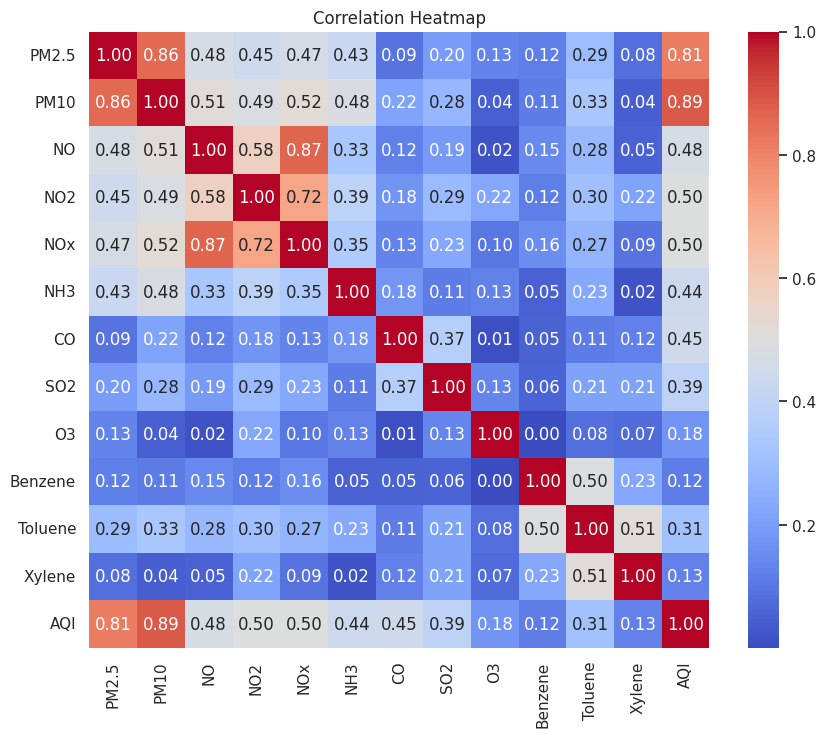

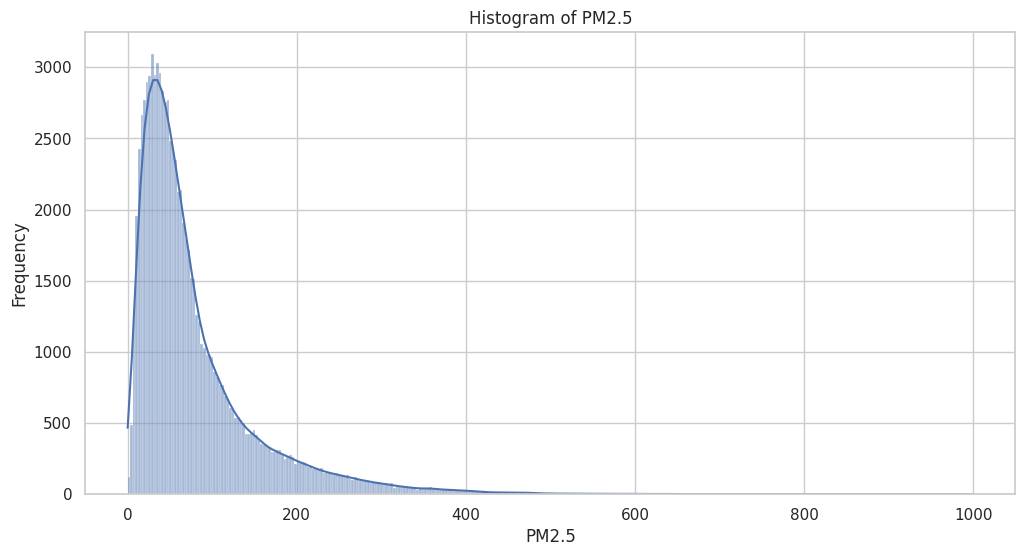

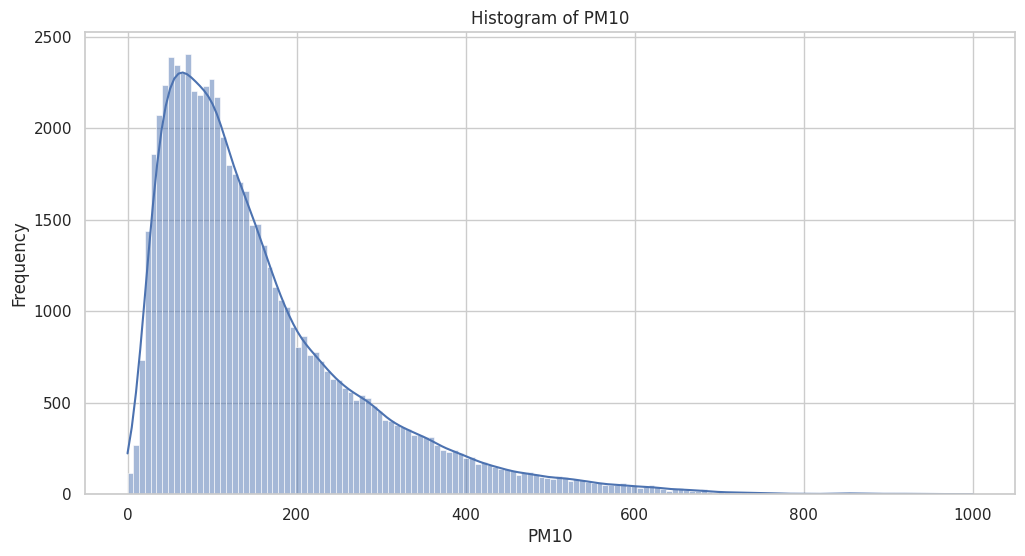

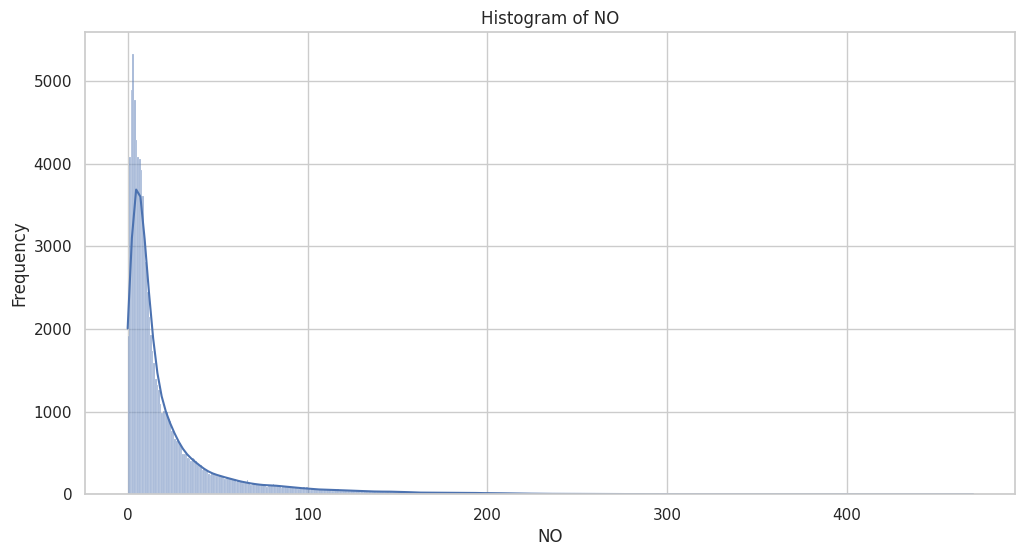

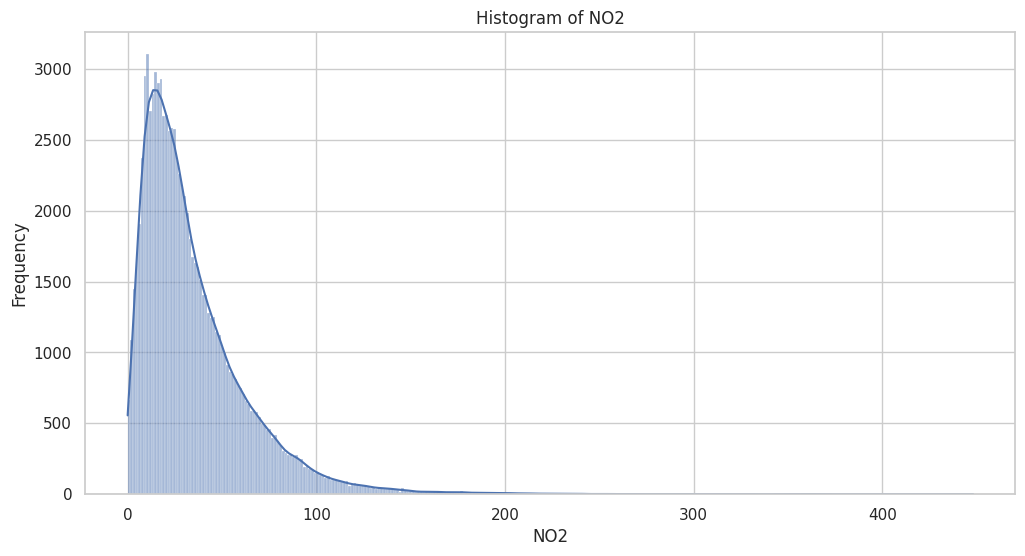

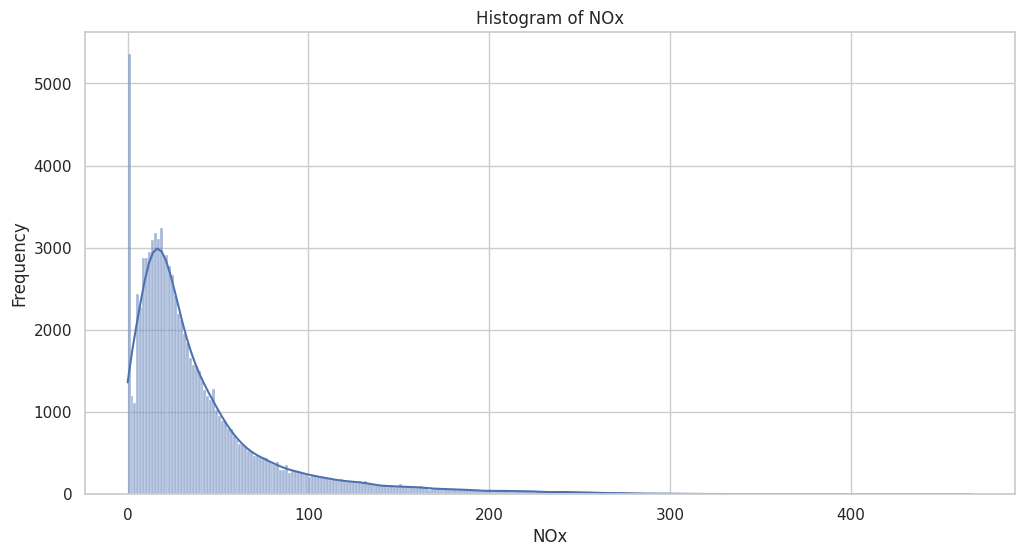

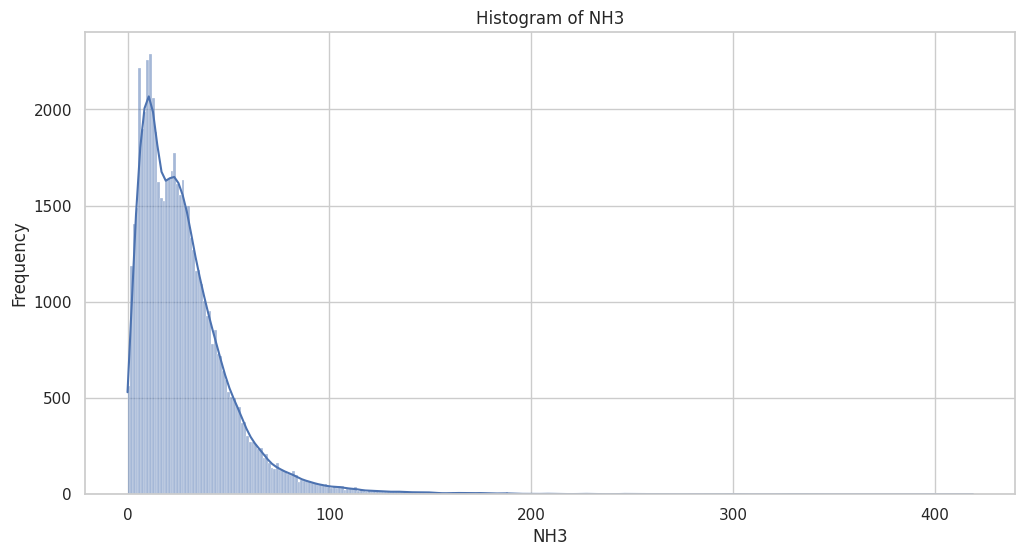

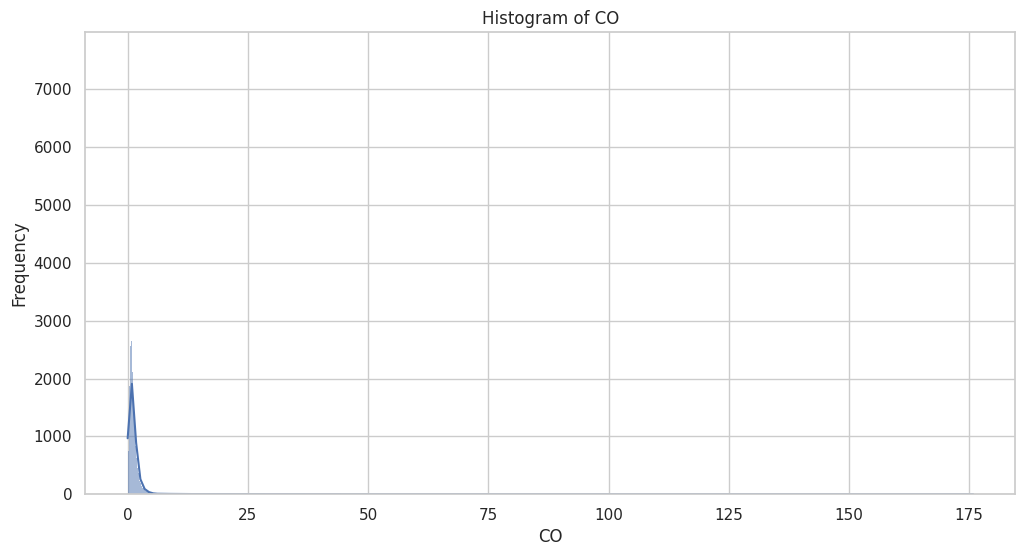

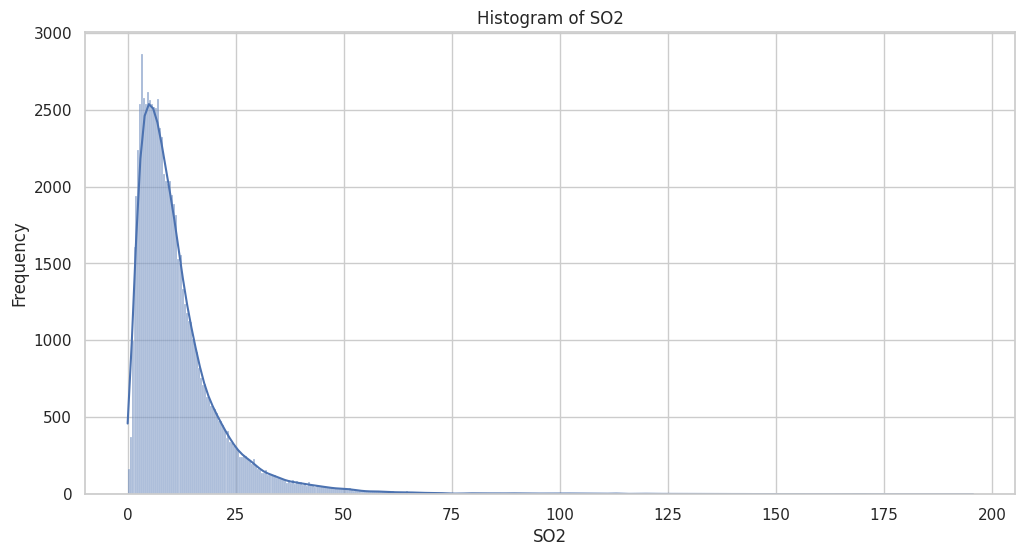

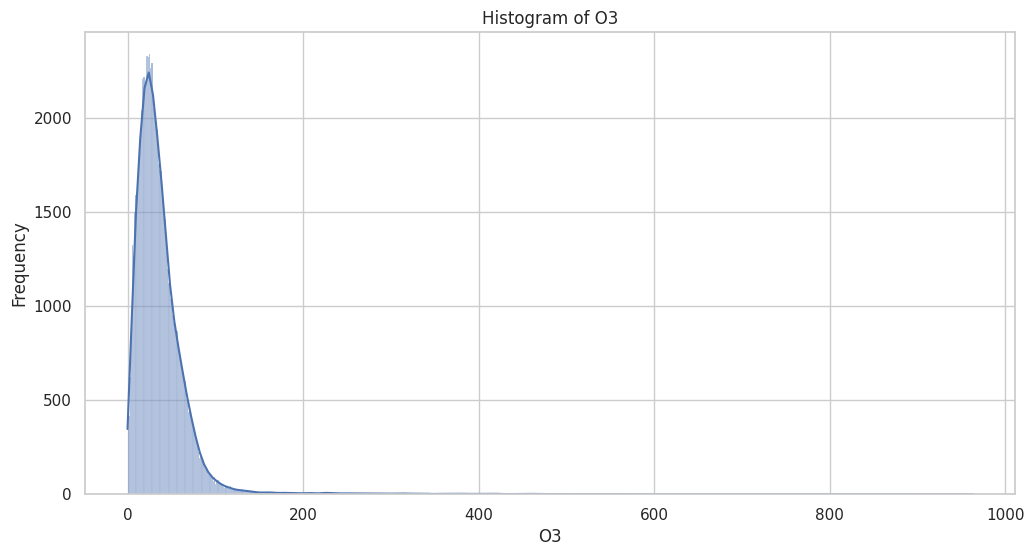

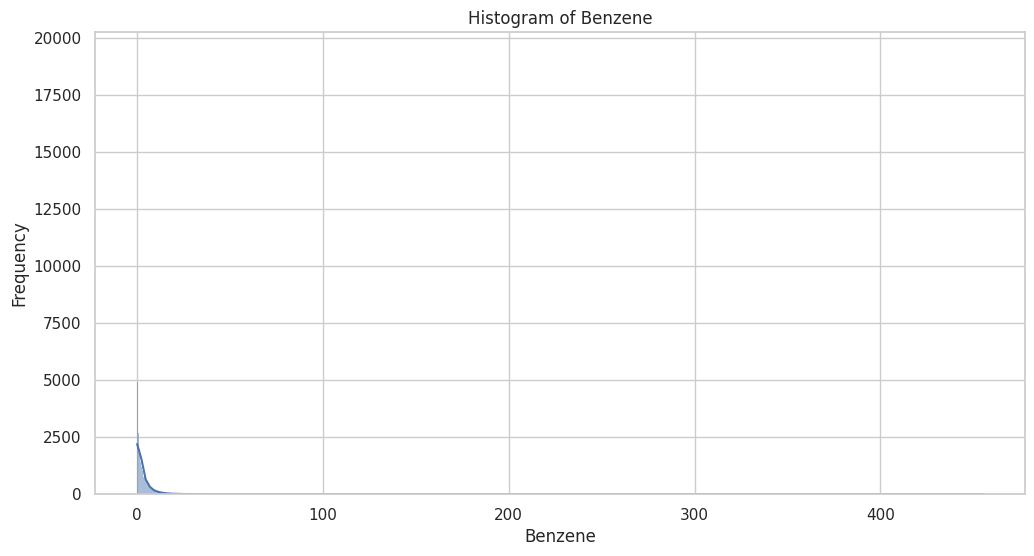

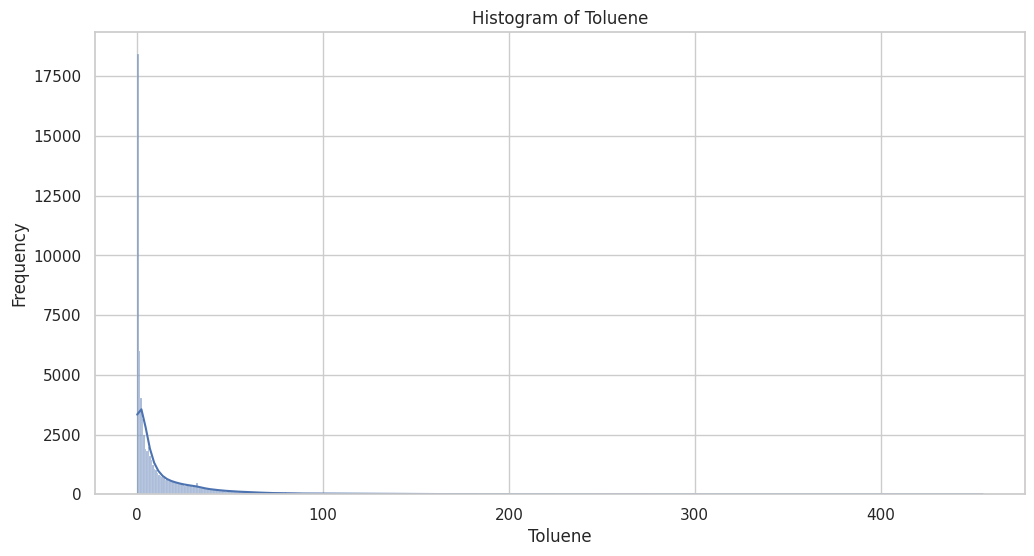

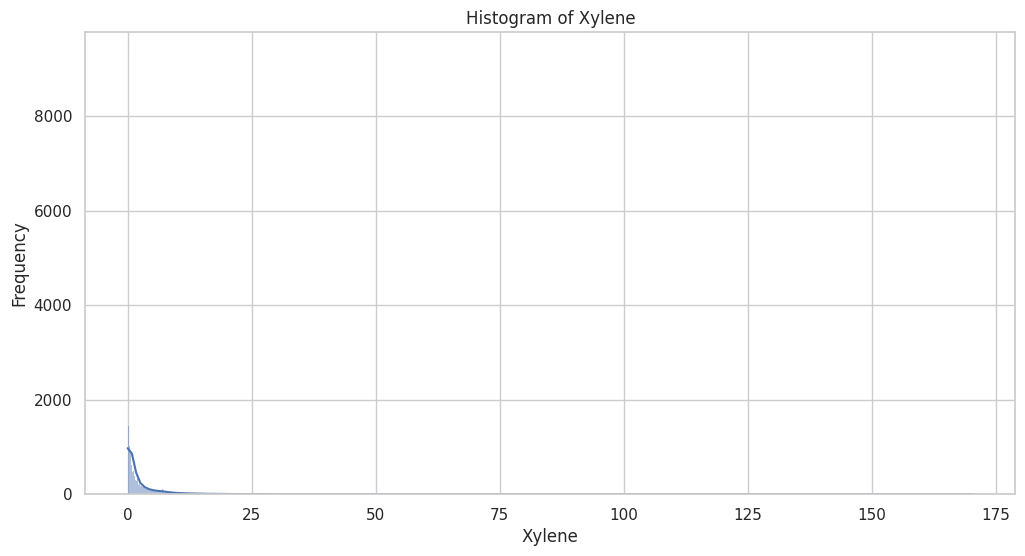

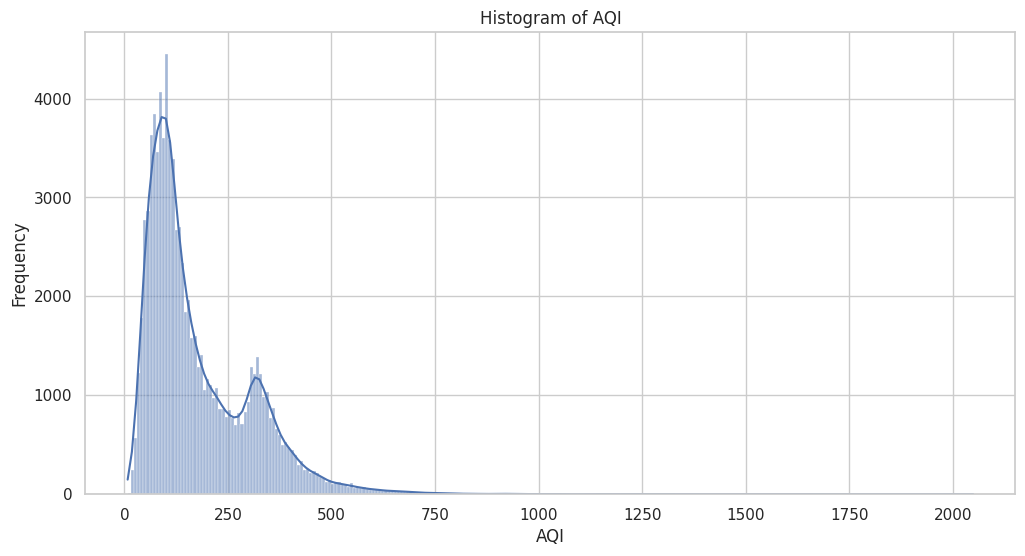

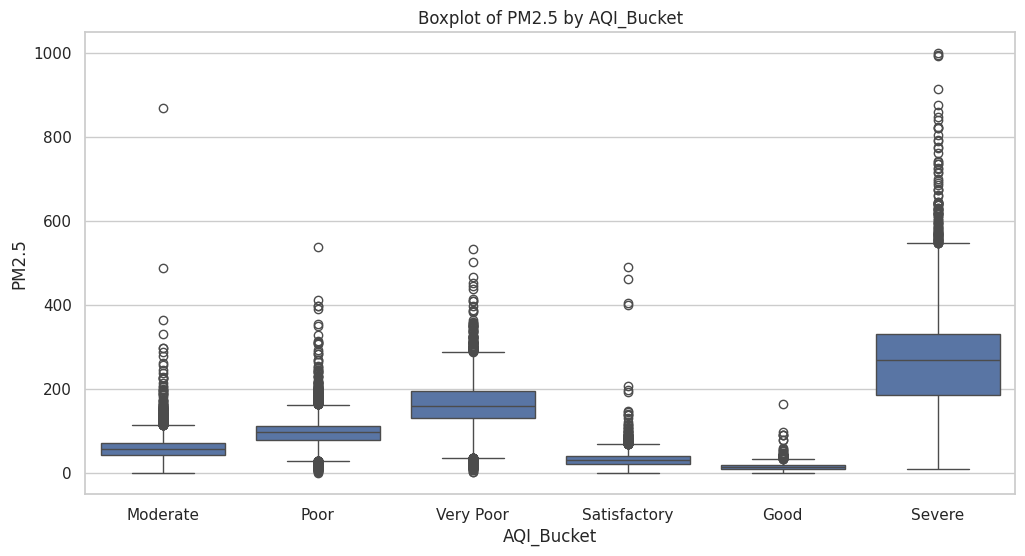

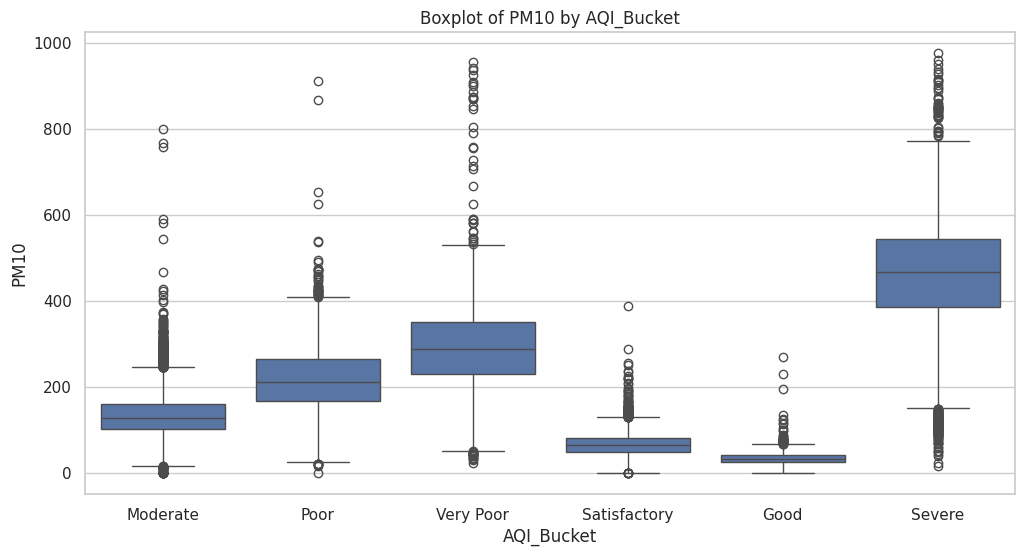

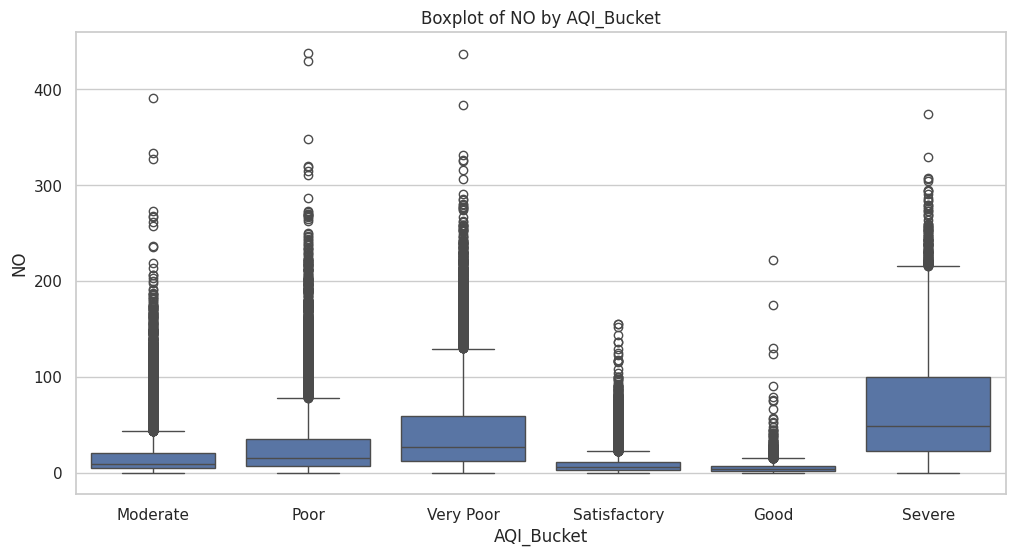

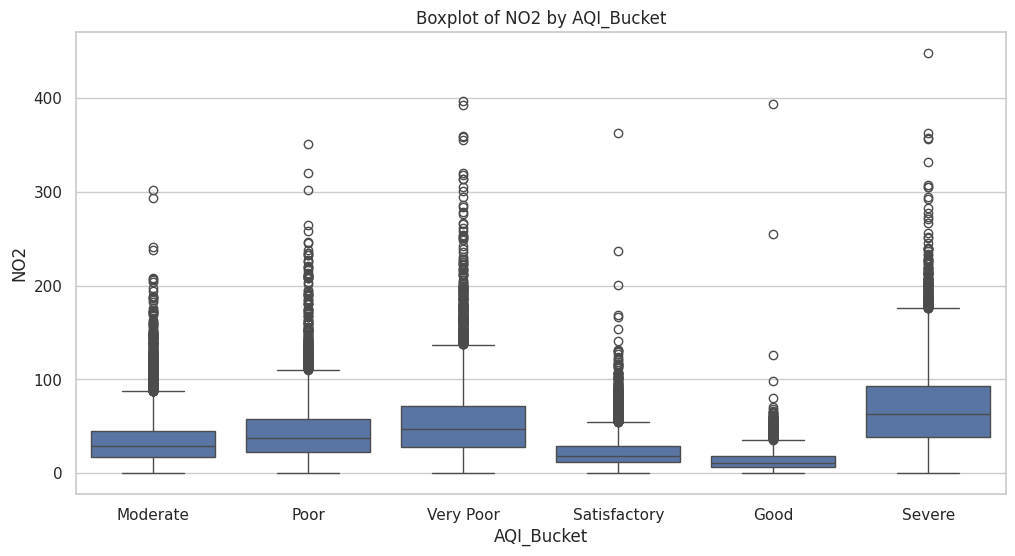

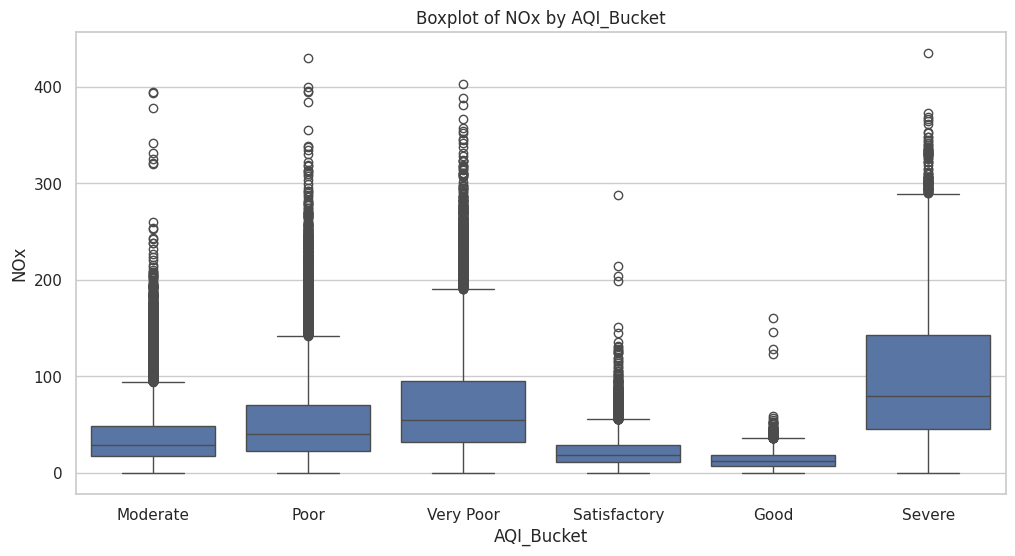

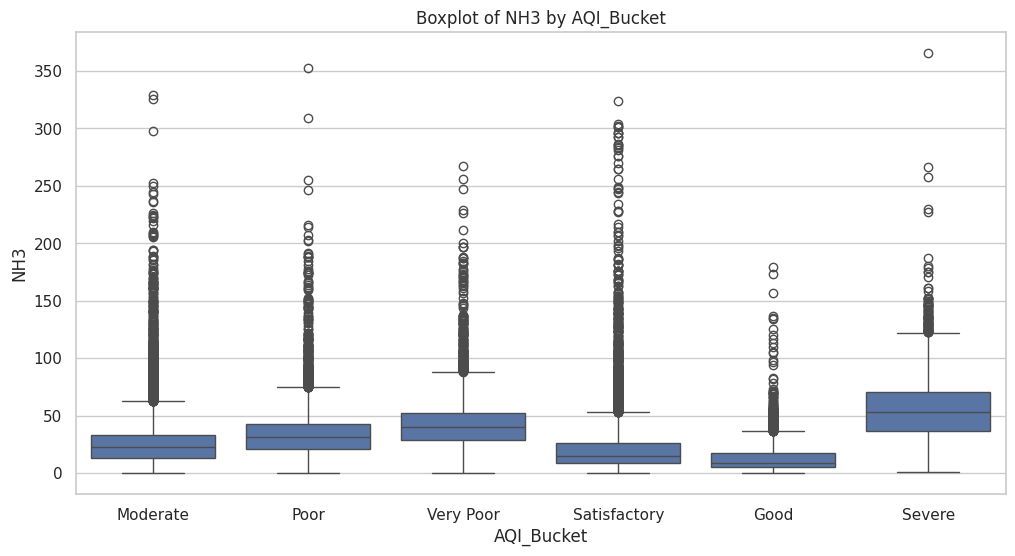

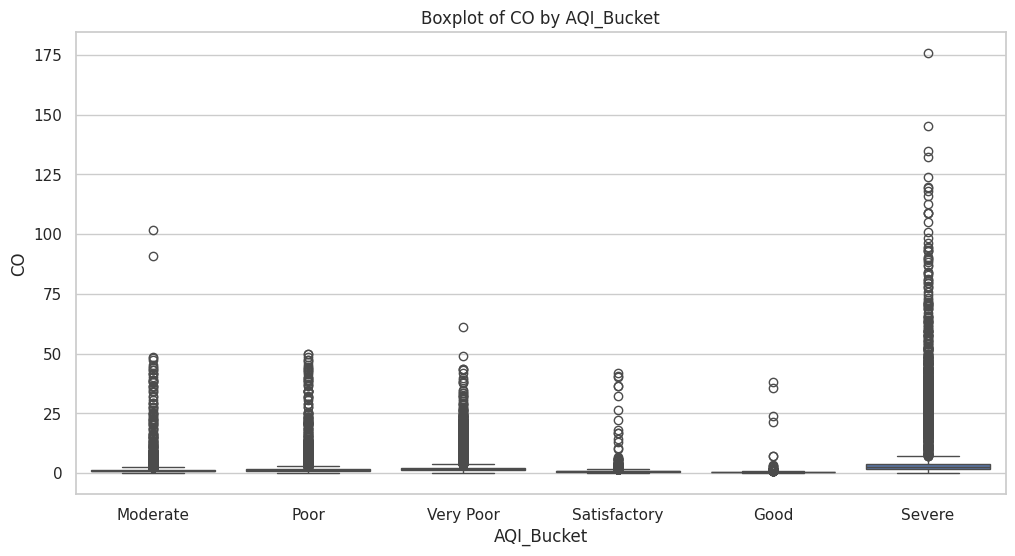

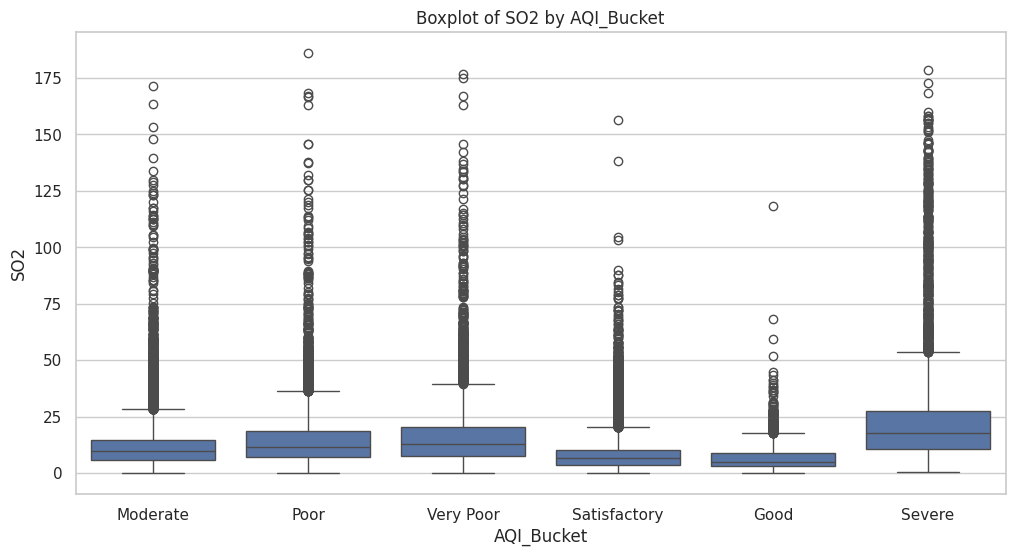

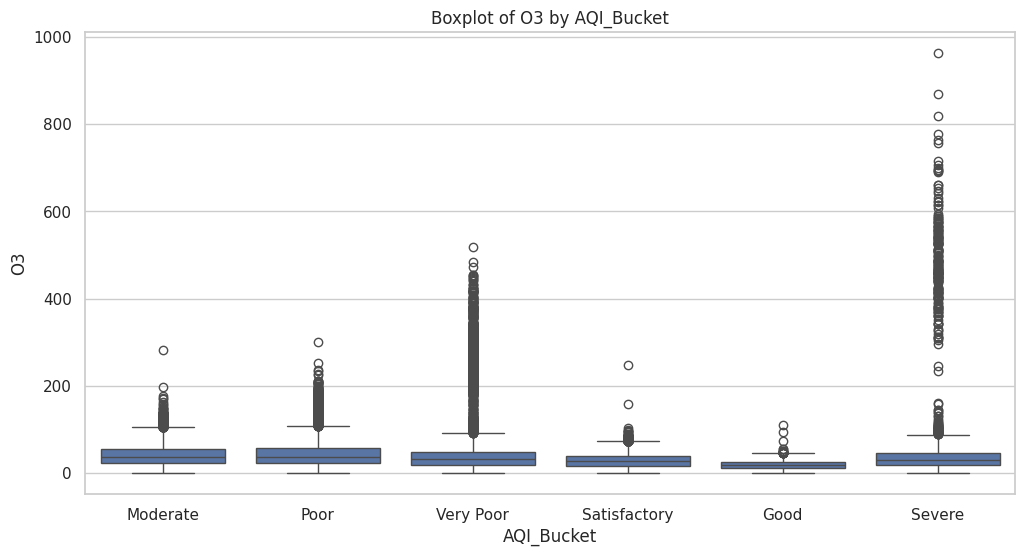

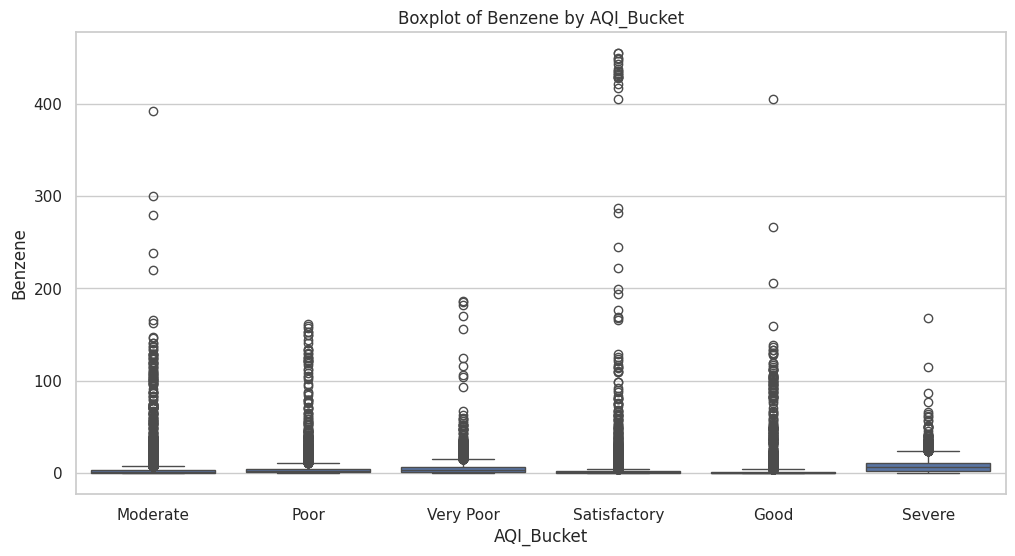

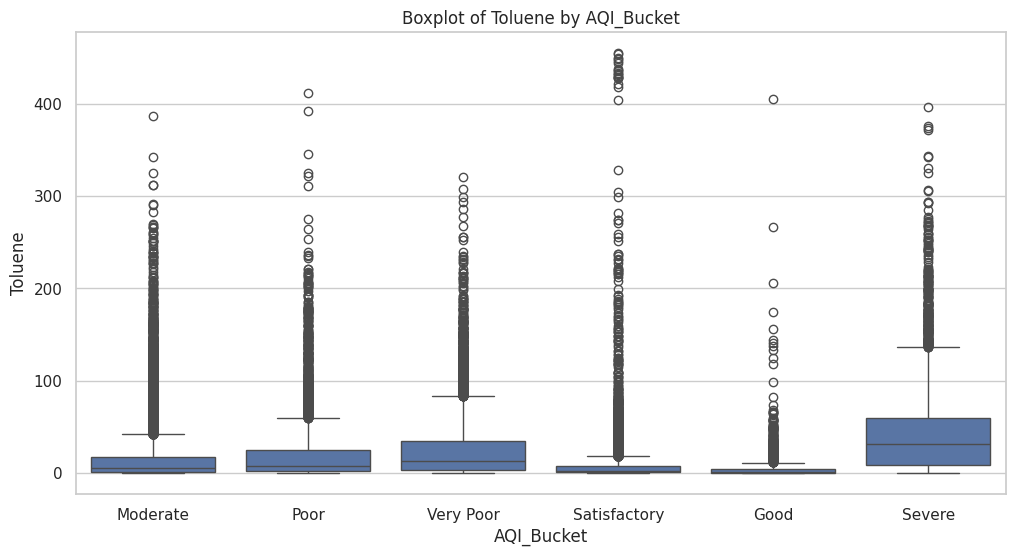

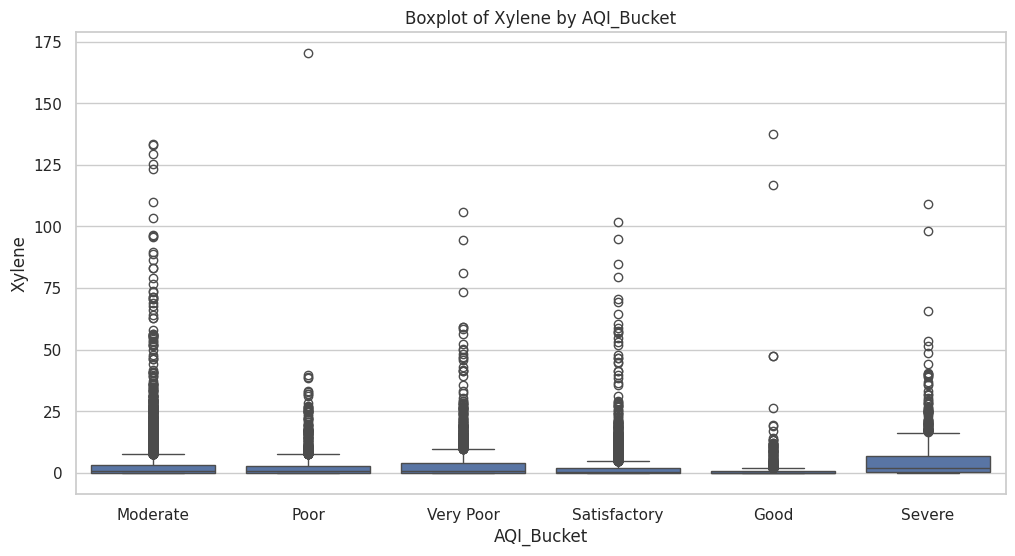

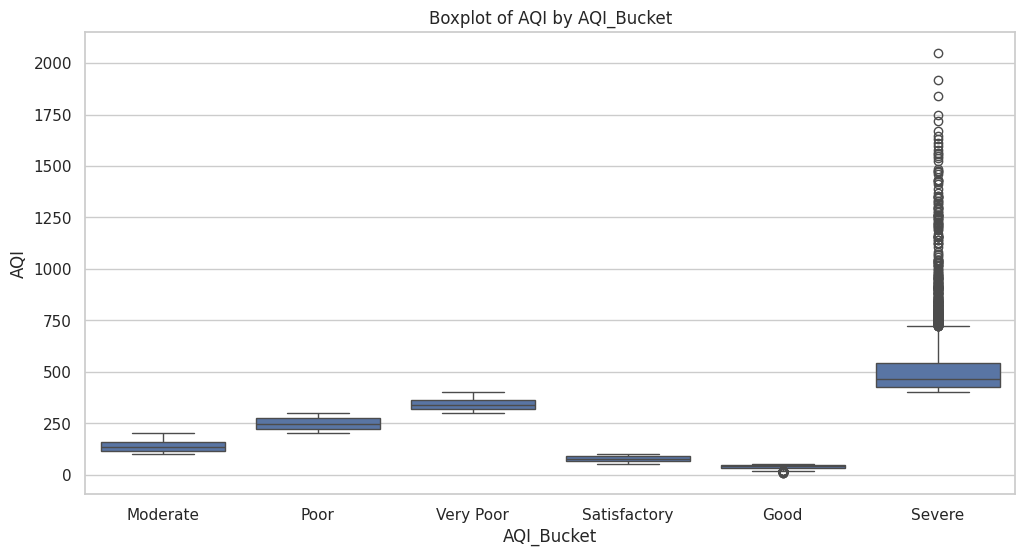

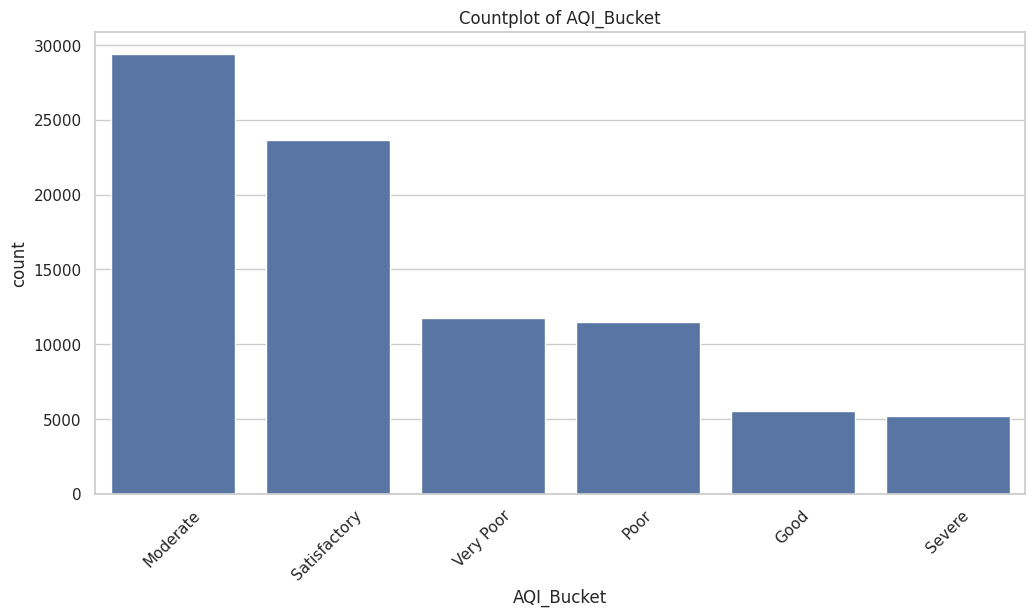

In [17]:
# =========================
# STEP 1: Import Libraries
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Set plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ==============================
# STEP 2: Upload File to Colab
# ==============================

# Upload the file from local system using file upload widget
uploaded = files.upload()

# Read the uploaded Excel file (we get a dictionary of {filename: content})
for file_name in uploaded.keys():
    # Load the Excel file into a pandas DataFrame
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# =========================
# STEP 3: Explore the Data
# =========================

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Show summary of dataset
print("\nData Summary:")
print(df.info())

# Show basic statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# ===========================================
# STEP 4: Generate All Possible Diagrams
# ===========================================

# Define numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 4.1 Pairplot for numeric columns (only if there are few)
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairplot of Numeric Columns", y=1.02)
    plt.show()

# 4.2 Correlation heatmap for numeric columns
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# 4.3 Histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 4.4 Boxplots for numeric vs categorical (if both exist)
for num_col in numeric_cols:
    for cat_col in categorical_cols:
        if df[cat_col].nunique() <= 10:  # Only use categorical with few unique values
            plt.figure()
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f"Boxplot of {num_col} by {cat_col}")
            plt.show()

# 4.5 Countplots for categorical columns
for col in categorical_cols:
    if df[col].nunique() <= 20:  # Avoid plots for high-cardinality categorical columns
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()

📂 Please upload the file: station_hour.csv.xlsx


Saving station_hour.csv.xlsx to station_hour.csv (1).xlsx

🧾 Available columns in the dataset:
['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

✅ First few rows of the dataset:


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


⚠️ 'City' column not found! Skipping city-based filtering.


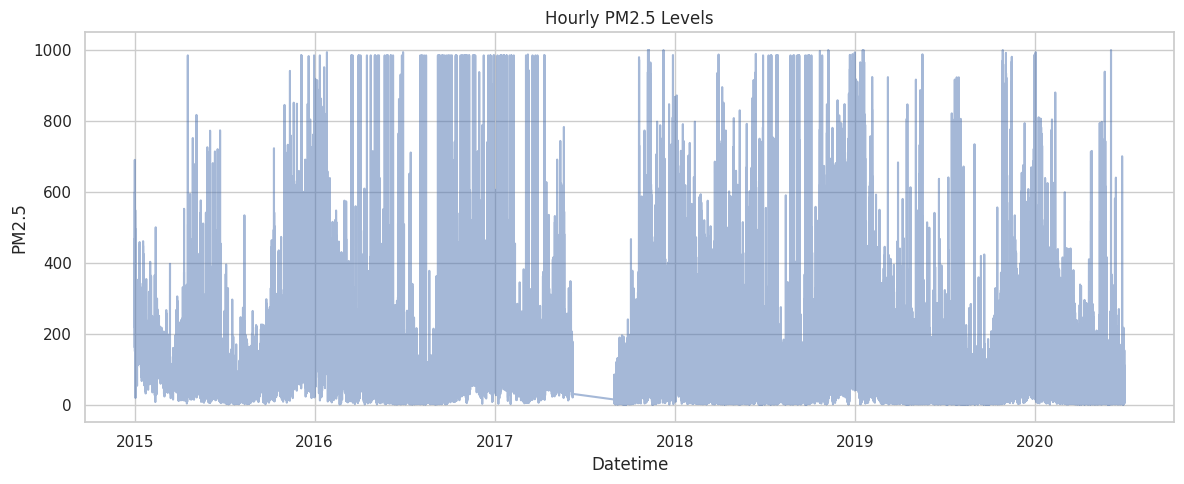

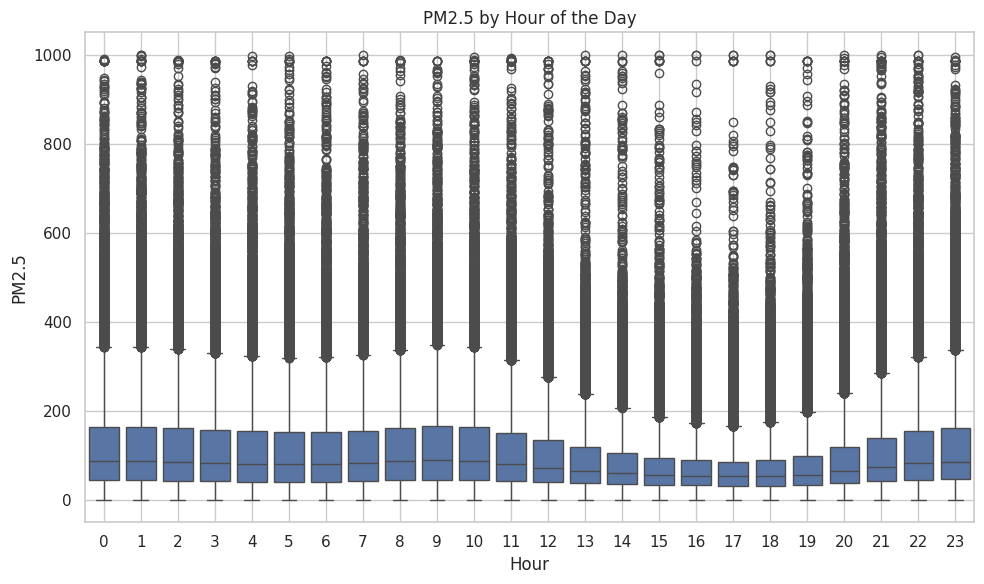

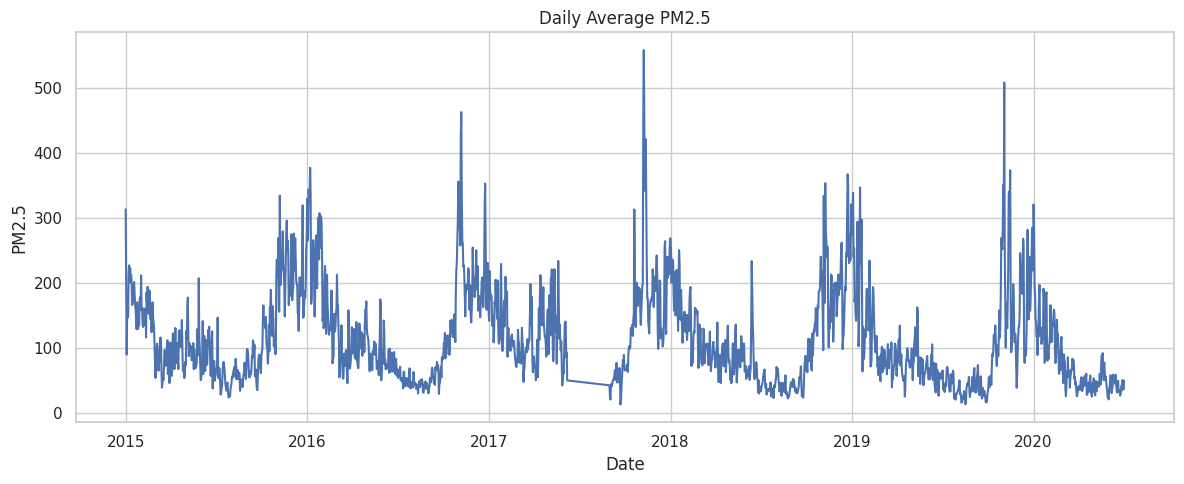


📊 Model Evaluation:
MAE: 27.54
RMSE: 46.59


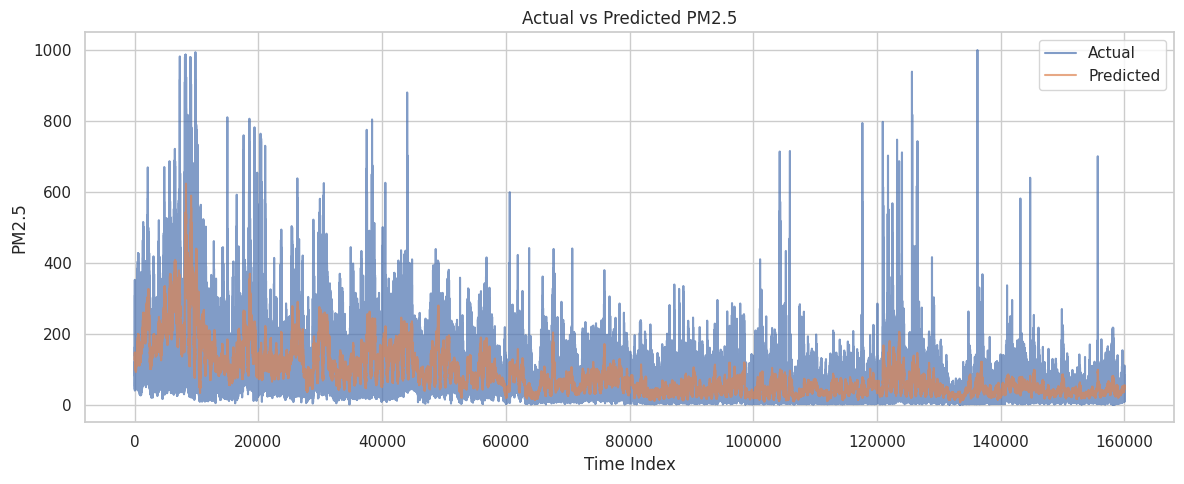

In [23]:
# ============================================
# AIR QUALITY ANALYSIS & FORECASTING (PM2.5)
# Dataset: station_hour.csv.xlsx
# ============================================

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files

# 2. Upload the dataset manually
print("📂 Please upload the file: station_hour.csv.xlsx")
uploaded = files.upload()

# 3. Load the dataset into a DataFrame
filename = next(iter(uploaded))
df = pd.read_excel(filename)

# 4. Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Print all column names to debug missing 'City' error
print("\n🧾 Available columns in the dataset:")
print(df.columns.tolist())

# Display first few rows
print("\n✅ First few rows of the dataset:")
display(df.head())

# 5. Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# 6. ✅ Check if 'City' column exists before filtering
if 'City' in df.columns:
    df = df[df['City'] == 'Delhi']
else:
    print("⚠️ 'City' column not found! Skipping city-based filtering.")

# Keep only relevant columns
if 'PM2.5' in df.columns and 'Datetime' in df.columns:
    df = df[['Datetime', 'PM2.5']].dropna().sort_values('Datetime')
else:
    raise KeyError("Required columns 'Datetime' or 'PM2.5' not found in the dataset.")

# 7. Create additional time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.date
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

# ==========================
# 🧪 Exploratory Data Analysis
# ==========================

# 8. PM2.5 trend over time
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['PM2.5'], alpha=0.5)
plt.title("Hourly PM2.5 Levels")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Boxplot of PM2.5 by Hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='PM2.5', data=df)
plt.title("PM2.5 by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Daily average PM2.5
daily_avg = df.groupby('Day')['PM2.5'].mean()
plt.figure(figsize=(12, 5))
daily_avg.plot()
plt.title("Daily Average PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================
# 📈 Time Series Forecasting
# ==========================

# 11. Create lag features
df['PM2.5_lag1'] = df['PM2.5'].shift(1)
df['PM2.5_lag24'] = df['PM2.5'].shift(24)
df['PM2.5_rolling24'] = df['PM2.5'].rolling(window=24).mean()
df = df.dropna()

# 12. Define features and target variable
features = ['PM2.5_lag1', 'PM2.5_lag24', 'PM2.5_rolling24']
X = df[features]
y = df['PM2.5']

# 13. Train-test split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 14. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 15. Predict on test set
y_pred = model.predict(X_test)

# 16. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n📊 Model Evaluation:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")

# 17. Plot predictions vs actuals
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted PM2.5")
plt.xlabel("Time Index")
plt.ylabel("PM2.5")
plt.grid(True)
plt.tight_layout()
plt.show()
